In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect('./password_data.sqlite')

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


## Data Cleaning

In [6]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [7]:
data.drop(columns="index",inplace=True)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [10]:
data.dtypes

password    object
strength     int64
dtype: object

In [11]:
data["strength"].unique()

array([1, 2, 0])

## Data Analysis

In [12]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [13]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [14]:
data[data["password"].str.isupper()].shape

(1506, 2)

In [15]:
data[data["password"].str.isalpha()].shape

(50, 2)

In [16]:
data[data["password"].str.isalnum()].shape
## 97% users has alphanumeric as the password

(97203, 2)

In [17]:
import string

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def find_semantics(row) :
    for char in row:
        if char in string.punctuation:
            return 1
    
    return 0

In [20]:
data[data["password"].apply(find_semantics) == 1].shape

(2663, 2)

## Feature Engineering

In [21]:
data['password'][0]

'zxe870819'

In [22]:
data["length"] = data['password'].str.len()

In [23]:
def freq_lowercase(row) :
    return len([char for char in row if char.islower()]) / len(row)

def freq_uppercase(row) :
    return len([char for char in row if char.isupper()]) / len(row)

def freq_numerical_case(row) :
    return len([char for char in row if char.isdigit()]) / len(row)

In [24]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase), 3)
data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase), 3)
data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case), 3)

In [25]:
def freq_special_case(row):
    special_chars = []
    for char in row: 
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    
    return len(special_chars)

In [26]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case), 3)

In [27]:
data["special_char_freq"] = data["special_char_freq"] / data["length"]

In [28]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [29]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

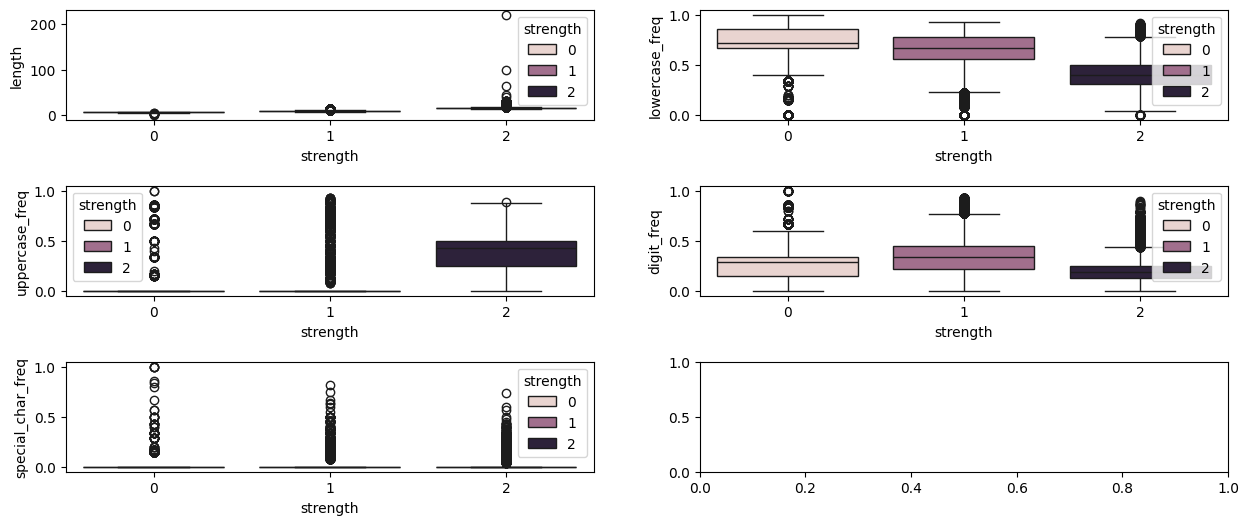

In [30]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,6))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [31]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [32]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

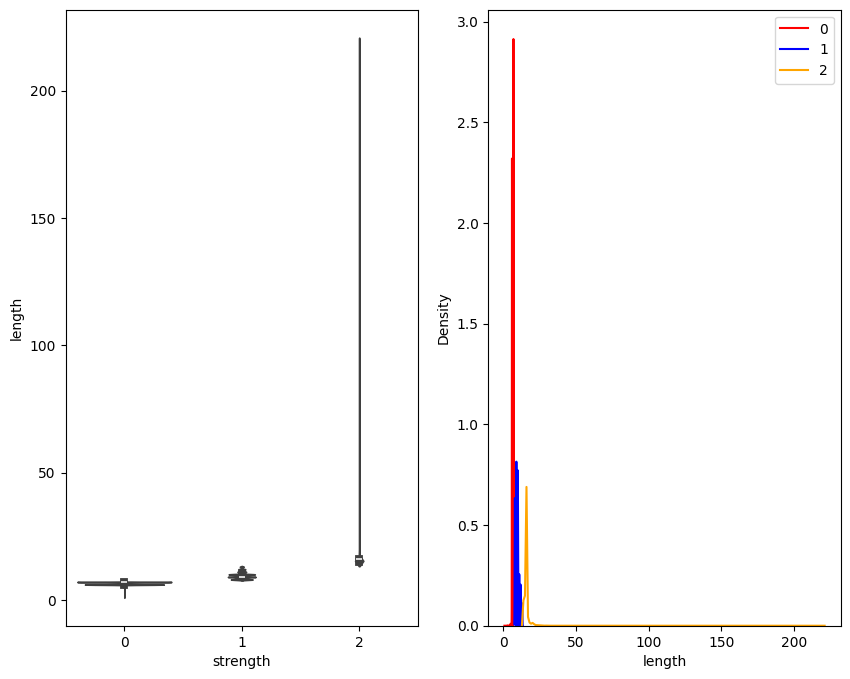

In [33]:
get_dist(data , "length")

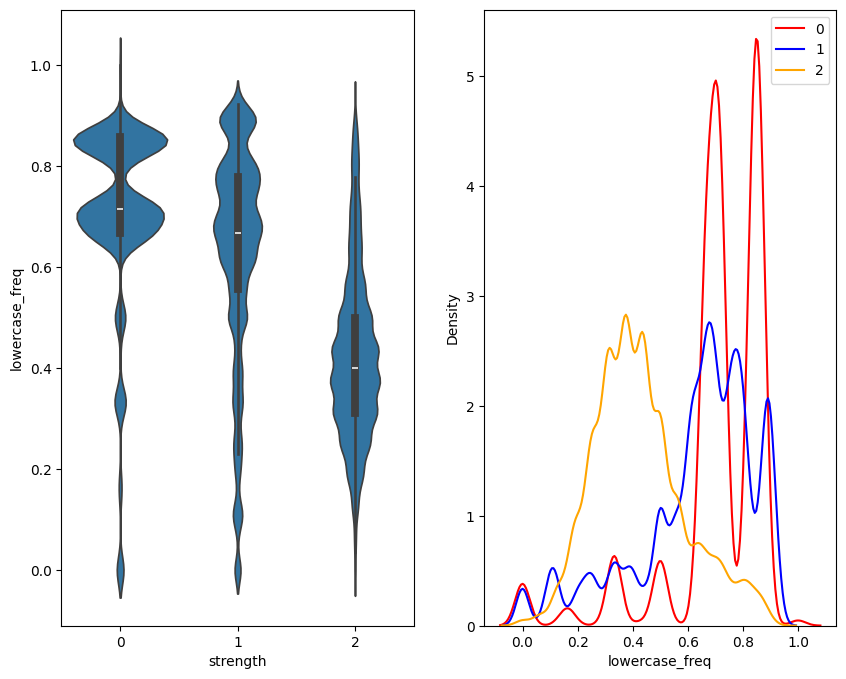

In [34]:
get_dist(data , 'lowercase_freq')

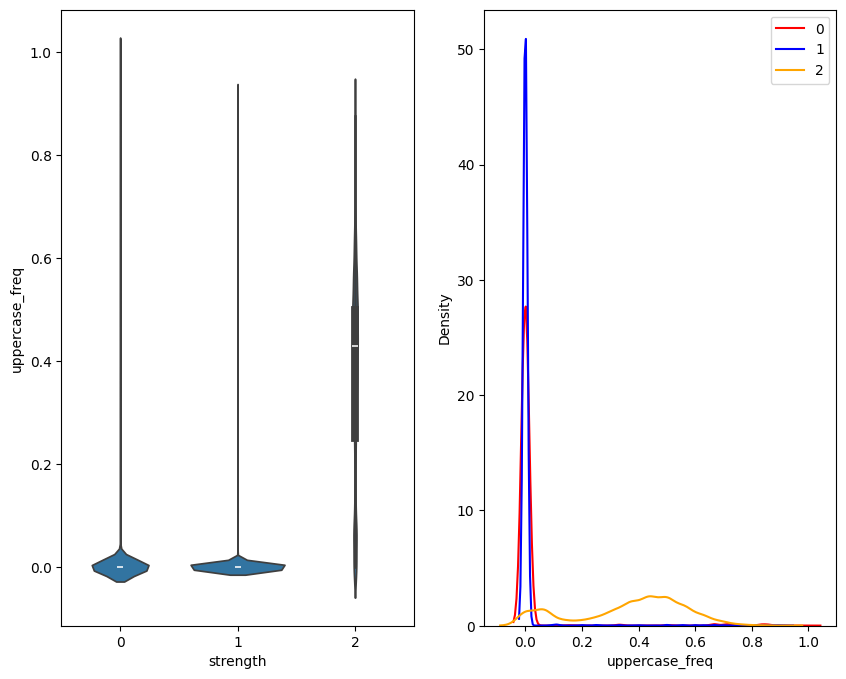

In [35]:
get_dist(data , 'uppercase_freq')

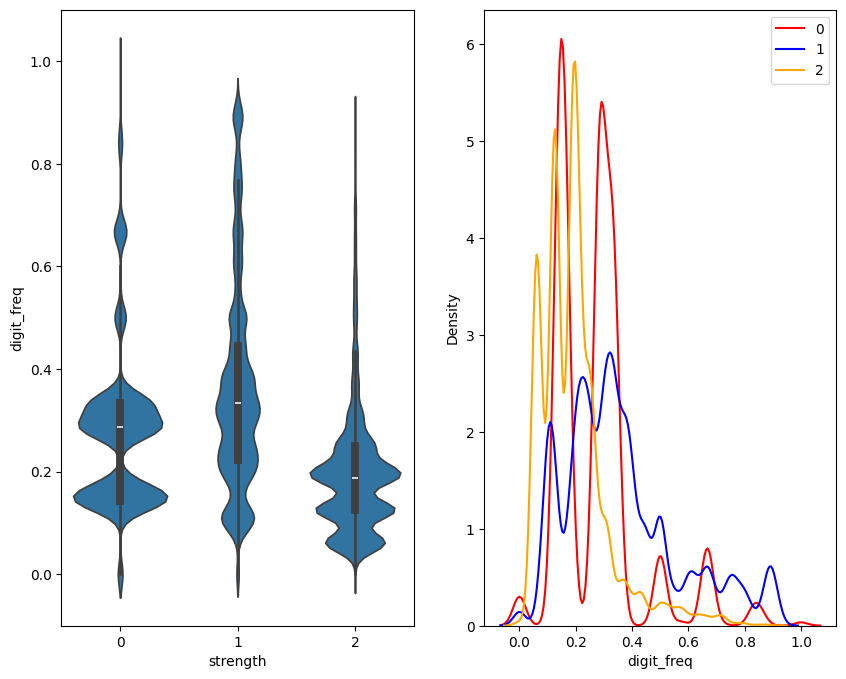

In [36]:
get_dist(data , 'digit_freq')

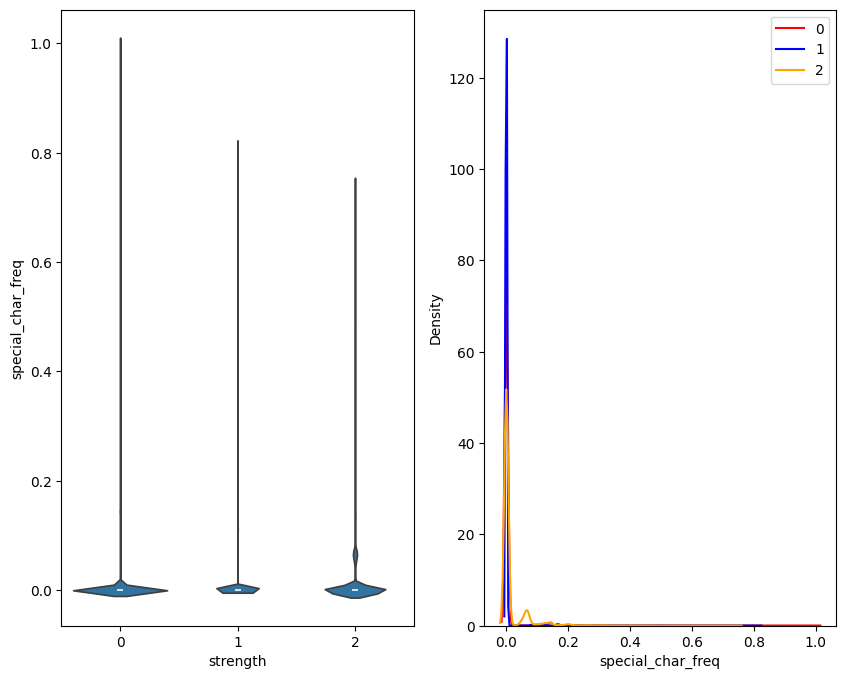

In [37]:
get_dist(data , 'special_char_freq')

## TF_IDF

- Text data into vector representation using NLP
- Passowrd into vector representation

In [38]:
dataframe = data.sample(frac=1)

In [39]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
24927,castillo18,1,10,0.800,0.0,0.200,0.0
477,yJTo9ijQzOQ7eTDE,2,16,0.375,0.5,0.125,0.0
80117,sistfa1874,1,10,0.600,0.0,0.400,0.0
88847,fuckyou8,1,8,0.875,0.0,0.125,0.0
87371,admin9329,1,9,0.556,0.0,0.444,0.0
...,...,...,...,...,...,...,...
3054,baznamete1234,1,13,0.692,0.0,0.308,0.0
44577,dams33,0,6,0.667,0.0,0.333,0.0
6427,algazall11,1,10,0.800,0.0,0.200,0.0
21549,dakpan1,0,7,0.857,0.0,0.143,0.0


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
vectorizer = TfidfVectorizer(analyzer="char")

In [42]:
x = list(dataframe["password"])

In [43]:
X = vectorizer.fit_transform(x)

In [44]:
X.shape

(100000, 99)

In [45]:
dataframe["password"].shape

(100000,)

In [46]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 842571 stored elements and shape (100000, 99)>

In [47]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22133024, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.32401191, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.21314896, 0.        , 0.33385889,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.25874519, 0.        , 0.        , 0.61473215, 0.        ,
       0.        , 0.26191039, 0.        , 0.        , 0.        ,
       0.29039815, 0.30226171, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
dataframe["password"]

24927          castillo18
477      yJTo9ijQzOQ7eTDE
80117          sistfa1874
88847            fuckyou8
87371           admin9329
               ...       
3054        baznamete1234
44577              dams33
6427           algazall11
21549             dakpan1
51674         bluewhizzy1
Name: password, Length: 100000, dtype: object

In [49]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [50]:
df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [51]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [53]:
df2["length"] = dataframe["length"]
df2["lowercase_freq"] = dataframe["lowercase_freq"]

In [54]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [57]:
y = dataframe["strength"]

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20, random_state=42)

In [59]:
X_train.shape

(80000, 101)

In [60]:
y_train.shape

(80000,)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf = LogisticRegression(multi_class="multinomial")

In [63]:
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [64]:
y_pred = clf.predict(X_test)

In [65]:
y_pred

array([2, 1, 1, ..., 1, 2, 1], shape=(20000,))

In [66]:
from collections import Counter

In [67]:
Counter(y_pred)

Counter({np.int64(1): 16859, np.int64(2): 1817, np.int64(0): 1324})

In [68]:
password ="%@123abcd"

In [73]:
sample_array = np.array([password])

In [74]:
sample_matrix = vectorizer.transform(sample_array)

In [75]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [80]:
new_matrix = np.append(sample_matrix.toarray(), (len(password), freq_lowercase(password))).reshape(1,101)

In [81]:
clf.predict(new_matrix)

array([0])

In [84]:
def predict():
    password = input("Enter the pasword: ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    new_matrix2 = np.append(sample_matrix.toarray(), (len(password), freq_lowercase(password))).reshape(1,101)

    result = clf.predict(new_matrix2)

    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is normal"
    else:
        return "Password is strong"

In [87]:
predict()

'Password is normal'

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [89]:
accuracy_score(y_test, y_pred)

0.7993

In [90]:
confusion_matrix(y_test, y_pred)

array([[  687,  2022,     4],
       [  555, 13855,   369],
       [   82,   982,  1444]])

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.25      0.34      2713
           1       0.82      0.94      0.88     14779
           2       0.79      0.58      0.67      2508

    accuracy                           0.80     20000
   macro avg       0.71      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000

